In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("Standard Metropolitan Areas Data - train_data.csv")
train_data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [3]:
train_data.shape

(99, 10)

In [5]:
train_data.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
labor             0
income            0
region            0
crime_rate        0
dtype: int64

In [146]:
#Feature Selection
x_df = train_data[['graduates']]
y_df = train_data[['crime_rate']]
# y_train = y_train.values.reshape(1,-1)
# x_train = x_train.reshape((1,-1))

In [147]:
print("X Shape: {}".format(x_df.shape))
print("Y Shape: {}".format(y_df.shape))

X Shape: (99, 1)
Y Shape: (99, 1)


In [148]:
# x_train2 = x_train.values.reshape((-1,1))
# y_train2 = y_train.values.reshape((-1,1))

In [149]:
# print("X Shape: {}".format(x_train2.shape))
# print("Y Shape: {}".format(y_train2.shape))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(79, 1) (79, 1)
(20, 1) (20, 1)


In [137]:
test_data = pd.read_csv("Standard Metropolitan Areas Data - model_prediction.csv")
test_data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
0,3650,34.6,11.1,2358,6224,62.9,539.3,7792,4,NaN
1,4883,72.4,7.3,873,2236,64.9,185.2,2353,4,NaN
2,1435,13.4,11.7,342,1076,44.7,156.8,2165,1,NaN
3,2042,24.5,16.5,4071,10039,51.9,681.7,10166,3,NaN
4,1630,41.9,10.7,724,4395,50.0,198.0,2445,3,NaN


In [136]:
test_data.shape

(42, 10)

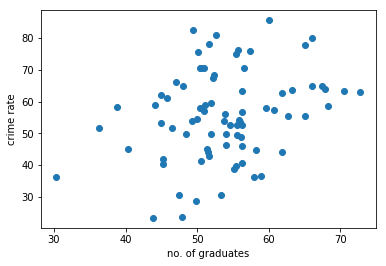

In [155]:
plt.scatter(X_train, y_train)
plt.ylabel("crime rate")
plt.xlabel("no. of graduates")
plt.show()

In [168]:
#Linear Regression
lin_reg = LinearRegression()
# lin_regr.fit(train_data[['graduates']], train_data[['crime_rate']])
linreg_model = lin_reg.fit(X_train, y_train)

In [169]:
print('Coefficients: \n', lin_reg.coef_)
print('intercept: \n', lin_reg.intercept_)

Coefficients: 
 [[0.53118746]]
intercept: 
 [27.08350716]


In [170]:
#formula obtained for the trained model
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x, y)

In [171]:
#plotting the prediction line 
# graph('lin_regr.coef_*x + lin_regr.intercept_', range(20, 80))
print(lin_reg.score(X_train, y_train))

0.08461591423854165


In [172]:
predictions = lin_reg.predict(X_test)
predictions

array([[54.01471128],
       [63.25737306],
       [64.95717292],
       [57.78614224],
       [58.9016359 ],
       [54.54589874],
       [55.55515491],
       [61.77004817],
       [50.08392409],
       [52.47426766],
       [55.98010488],
       [60.97326699],
       [56.3519361 ],
       [56.29881735],
       [57.25495478],
       [64.63846045],
       [52.20867393],
       [54.06783003],
       [58.9016359 ],
       [58.10485471]])

In [174]:
print("Score:", linreg_model.score(X_test, y_test))

Score: 0.07717384523010506


In [178]:
#Logistic Regression
log_reg = LogisticRegression()
logreg_model = log_reg.fit(X_train, y_train.astype('int'))

/home/gunnika/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gunnika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [179]:
print(log_reg.score(X_train, y_train))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets